In [0]:
from fastai import *
from fastai.tabular import *
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd "/content/drive/My Drive/automatic-asset-classification"
%ls "/content/drive/My Drive/automatic-asset-classification"

/content/drive/My Drive/automatic-asset-classification
data/


In [0]:
%ls "/content/drive/My Drive/automatic-asset-classification/data"

final_dataset/


In [0]:
from fastai.vision import *
#from fastai.widgets.image_cleaner import *
import matplotlib.pyplot as plt
import os
import pandas as pd


In [0]:
image_path = "/content/drive/My Drive/automatic-asset-classification/data/final_dataset"
data = ImageDataBunch.from_folder(image_path, valid_pct = 0.2, size=224,ds_tfms=get_transforms(), test = "test").normalize(imagenet_stats)


In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
#fit on just end layers (other layers are froze)
learn.fit_one_cycle(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 35.5MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.602892,1.455438,0.538462,02:28
1,1.890765,0.820581,0.253846,00:30
2,1.442616,0.756593,0.269231,00:29
3,1.182953,0.748616,0.276923,00:27


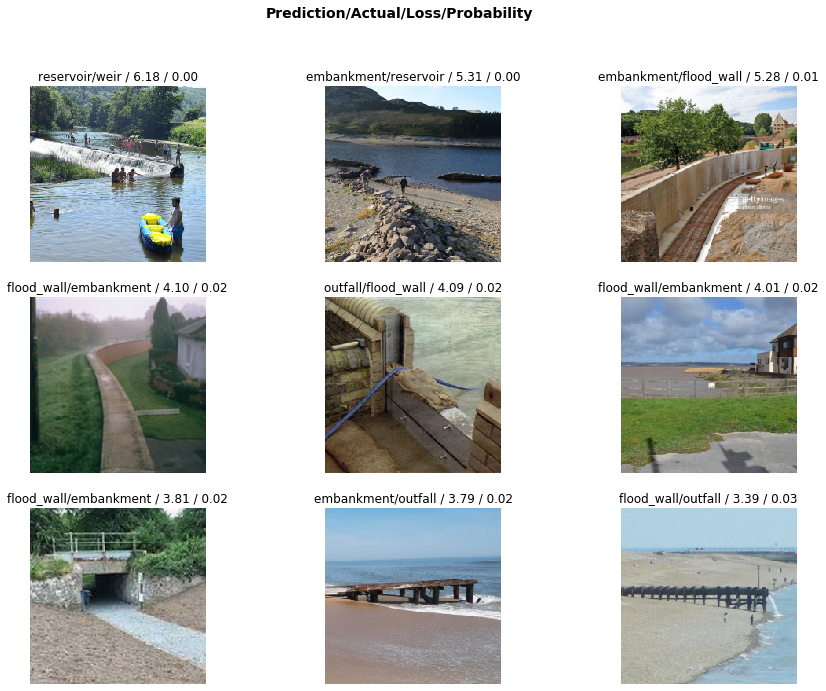

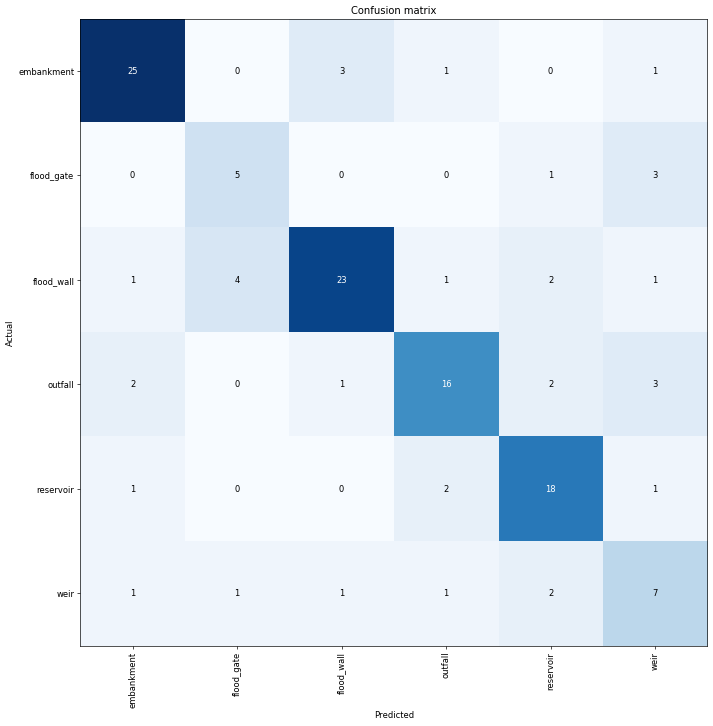

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
#len(data.valid_ds)==len(losses)==len(idxs)
#validation analysis
interp.plot_top_losses(9, figsize=(15,11))
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
learn.lr_find(stop_div=False, num_it=200)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.75E-07
Min loss divided by 10: 1.74E-03


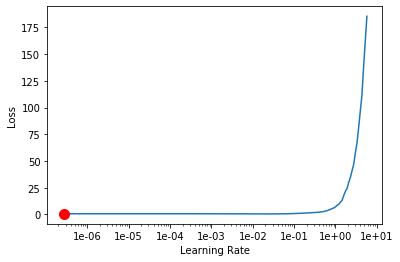

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(2, max_lr = slice(1.74E-03, 2.75E-07))

epoch,train_loss,valid_loss,error_rate,time
0,0.647956,0.748248,0.269231,00:29
1,0.630655,0.739226,0.269231,00:30


In [0]:
learn.save("lil_test")

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(2, max_lr = slice(1.74E-03, 2.75E-07))

epoch,train_loss,valid_loss,error_rate,time
0,0.892120,2.146363,0.561538,00:29
1,0.939101,2.033204,0.569231,00:29


In [0]:
learn.load("lil_test")

Learner(data=ImageDataBunch;

Train: LabelList (522 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
weir,weir,weir,weir,weir
Path: /content/drive/My Drive/automatic-asset-classification/data/final_dataset;

Valid: LabelList (130 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
embankment,flood_wall,flood_wall,embankment,reservoir
Path: /content/drive/My Drive/automatic-asset-classification/data/final_dataset;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: /content/drive/My Drive/automatic-asset-classification/data/final_dataset, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=

In [0]:
learn.fit_one_cycle(2, max_lr = slice(2.75E-07, 1.74E-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.650207,0.713910,0.230769,00:30
1,0.545594,0.691673,0.230769,00:30


In [0]:
learn.fit_one_cycle(10, max_lr = slice(2.75E-07, 1.74E-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.471890,0.678919,0.223077,00:29
1,0.439708,0.662922,0.215385,00:29
2,0.422856,0.663957,0.223077,00:30
3,0.396380,0.575715,0.207692,00:29
4,0.367230,0.567745,0.161538,00:30
5,0.326807,0.575749,0.176923,00:29
6,0.298443,0.604396,0.184615,00:29
7,0.276237,0.602476,0.176923,00:28
8,0.258793,0.610115,0.184615,00:30
9,0.240345,0.603333,0.184615,00:30


In [0]:
learn.fit_one_cycle(10, max_lr = slice(2.75E-07, 1.74E-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.166869,0.587074,0.192308,00:30
1,0.173423,0.572929,0.215385,00:30
2,0.158613,0.552781,0.176923,00:29
3,0.147172,0.557156,0.176923,00:29
4,0.135843,0.573531,0.192308,00:28
5,0.133068,0.580623,0.200000,00:30
6,0.122416,0.579244,0.192308,00:30
7,0.113860,0.594900,0.207692,00:29
8,0.108174,0.595969,0.192308,00:30
9,0.105858,0.594079,0.200000,00:30


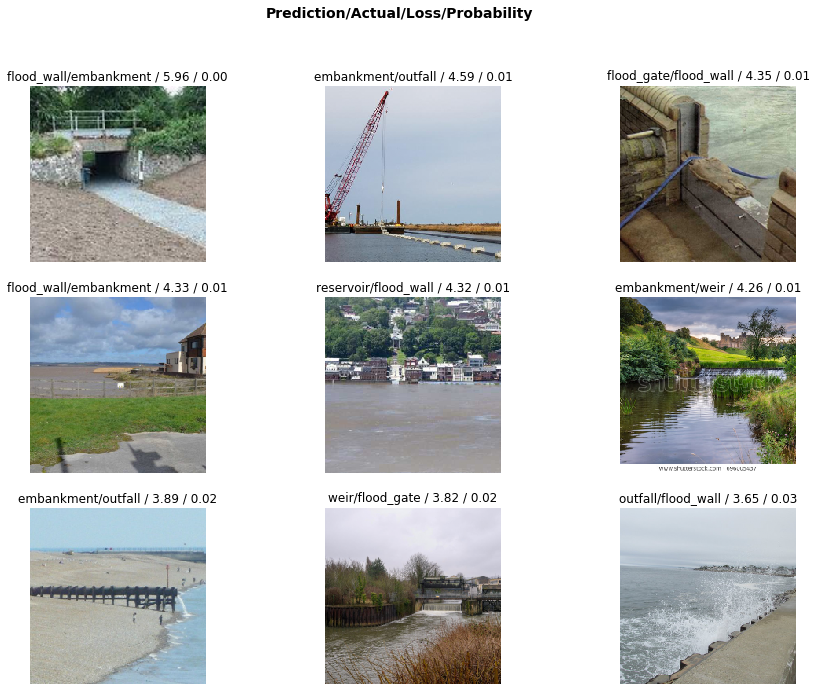

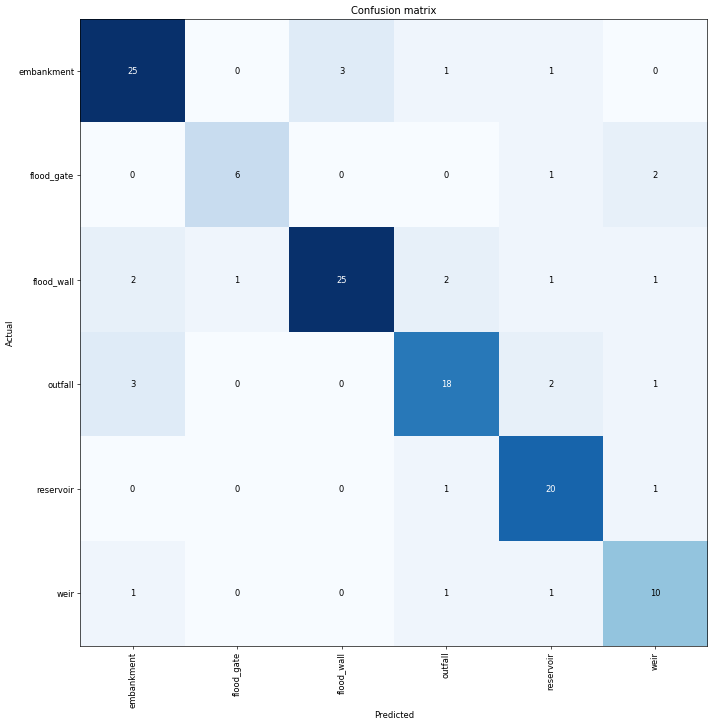

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
#len(data.valid_ds)==len(losses)==len(idxs)
#validation analysis
interp.plot_top_losses(9, figsize=(15,11))
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
data

ImageDataBunch;

Train: LabelList (522 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
weir,weir,weir,weir,weir
Path: /content/drive/My Drive/automatic-asset-classification/data/final_dataset;

Valid: LabelList (130 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
embankment,flood_wall,flood_wall,embankment,reservoir
Path: /content/drive/My Drive/automatic-asset-classification/data/final_dataset;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: /content/drive/My Drive/automatic-asset-classification/data/final_dataset

In [0]:
learn2 = cnn_learner(data, models.resnet50, metrics=error_rate)
#fit on just end layers (other layers are froze)
learn2.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.099248,1.380410,0.376923,00:30
1,1.413929,1.000567,0.292308,00:29
2,1.101289,0.911509,0.261538,00:30
3,0.882397,0.914367,0.276923,00:29


In [0]:
learn2.lr_find(stop_div=False, num_it=200)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.75E-07
Min loss divided by 10: 9.12E-04


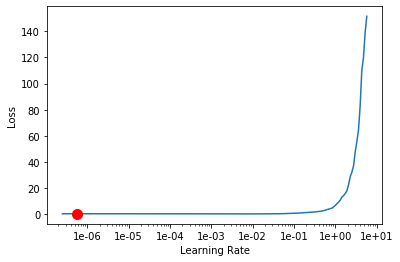

In [0]:
learn2.recorder.plot(suggestion = True)

In [0]:
learn2.unfreeze()
learn2.save("just_another")
learn2.fit_one_cycle(10, max_lr = slice(1e-06, 1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.409495,0.855913,0.269231,00:29
1,0.406496,0.775990,0.253846,00:29
2,0.331643,0.805629,0.215385,00:30
3,0.297956,0.752068,0.223077,00:28
4,0.261453,0.738412,0.246154,00:29
5,0.232750,0.741627,0.238462,00:29
6,0.212205,0.724236,0.246154,00:28
7,0.187459,0.692879,0.238462,00:28
8,0.171464,0.691452,0.238462,00:28
9,0.153096,0.687937,0.230769,00:28


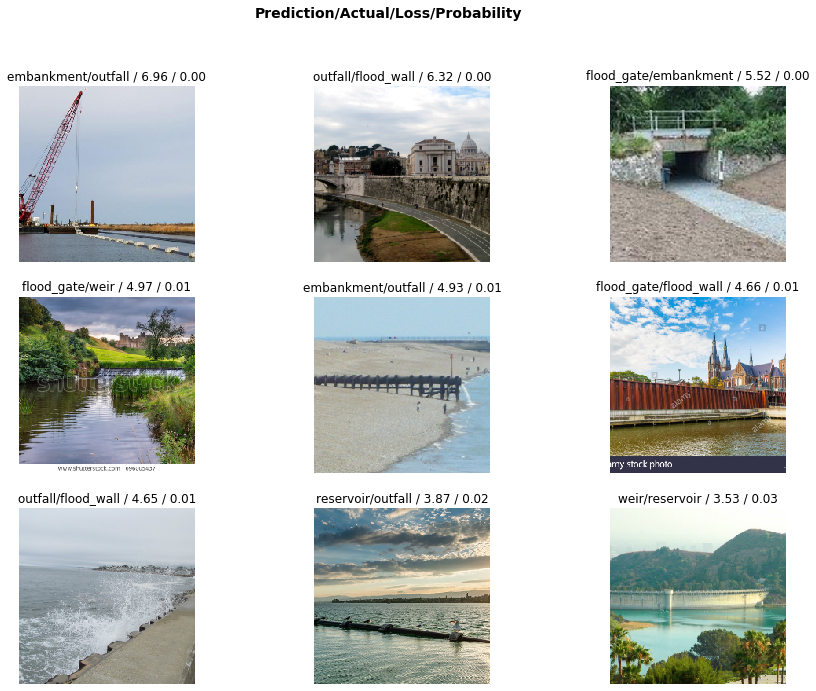

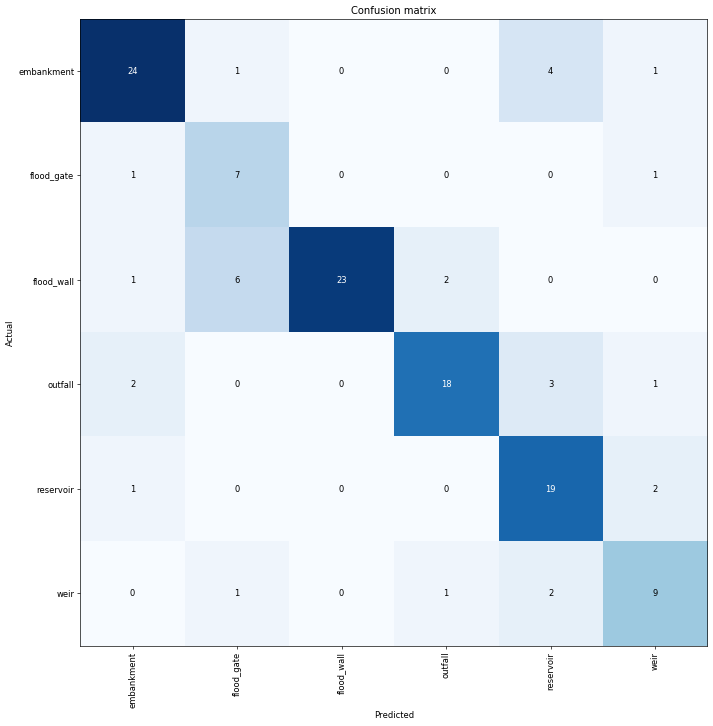

In [0]:
interp = ClassificationInterpretation.from_learner(learn2)
losses,idxs = interp.top_losses()
#len(data.valid_ds)==len(losses)==len(idxs)
#validation analysis
interp.plot_top_losses(9, figsize=(15,11))
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
learn3 = cnn_learner(data, models.resnet50, metrics=error_rate)
learn3.load("just_another")
learn3.fit_one_cycle(10, max_lr = slice(9.12E-06,9.12E-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.436657,0.892924,0.276923,00:29
1,0.385111,0.813415,0.269231,00:28
2,0.351603,0.770396,0.253846,00:28
3,0.354369,0.779508,0.269231,00:28
4,0.322170,0.680113,0.200000,00:28
5,0.303132,0.653048,0.230769,00:28
6,0.290925,0.649044,0.207692,00:28
7,0.285853,0.648217,0.200000,00:28
8,0.272613,0.647625,0.200000,00:28
9,0.253218,0.640614,0.200000,00:28


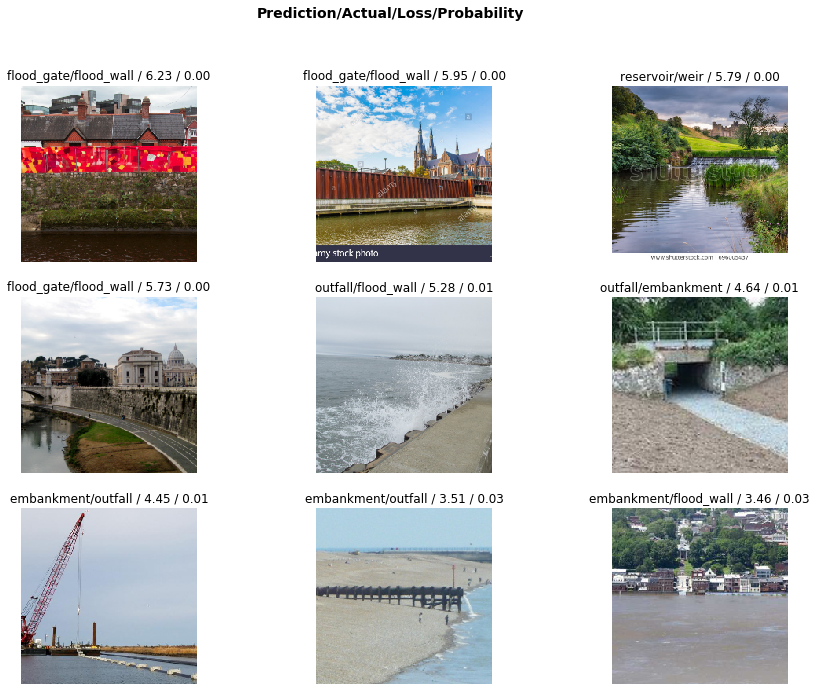

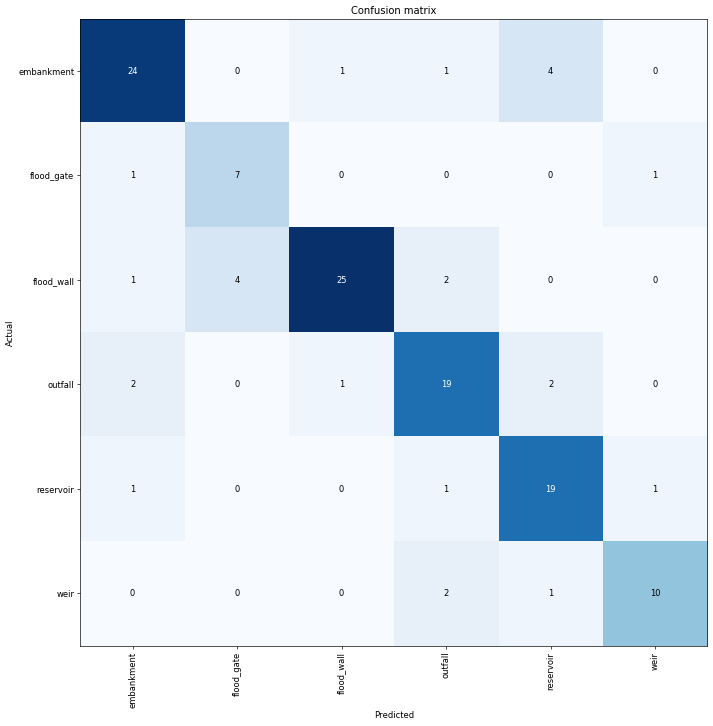

In [0]:
interp = ClassificationInterpretation.from_learner(learn3)
losses,idxs = interp.top_losses()
#len(data.valid_ds)==len(losses)==len(idxs)
#validation analysis
interp.plot_top_losses(9, figsize=(15,11))
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)